In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
df = pd.read_csv('earthquake_dataset.csv')

data_modified = df[['time', 'latitude', 'longitude', 'mag']]

data_modified['time'] = pd.to_datetime(df['time'])

data_modified.info()
data_modified.head()

filtered_data_higher = data_modified[data_modified['mag'] >= 5]
filtered_data_lower = data_modified[data_modified['mag'] < 5]

result_higher = filtered_data_higher[['mag']]
result_lower = filtered_data_lower[['mag']]

count_higher = filtered_data_higher['mag'].count()
count_lower = filtered_data_lower['mag'].count()

print(result_higher)
print("Number of values with mag >= 5:", count_higher)

print(result_lower)
print("Number of values with mag < 5:", count_lower)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       18105 non-null  datetime64[ns, UTC]
 1   latitude   18105 non-null  float64            
 2   longitude  18105 non-null  float64            
 3   mag        18105 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 565.9 KB
       mag
24     5.1
52     5.0
80     5.0
84     5.0
87     5.1
...    ...
18080  5.5
18085  5.1
18088  5.2
18097  6.0
18104  5.2

[1864 rows x 1 columns]
Number of values with mag >= 5: 1864
       mag
0      4.5
1      4.4
2      4.1
3      4.1
4      4.5
...    ...
18099  4.6
18100  4.6
18101  4.7
18102  4.5
18103  4.6

[16241 rows x 1 columns]
Number of values with mag < 5: 16241


C:\Users\robin\AppData\Local\Temp\ipykernel_11920\3485728558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['time'] = pd.to_datetime(df['time'])


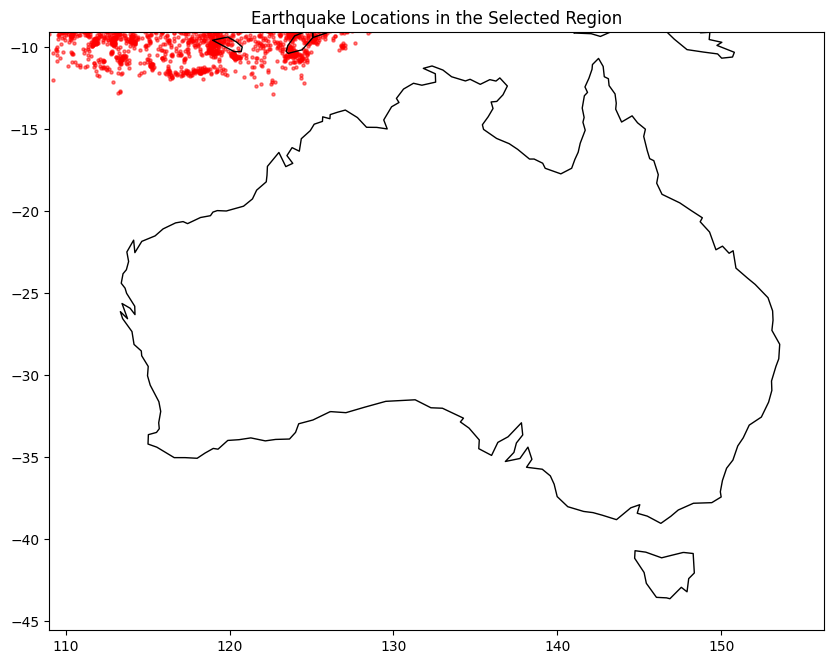

In [2]:
# Plot map of investigating region
df_geo = gpd.GeoDataFrame(data_modified, geometry = gpd.points_from_xy(df.longitude, df.latitude))

# Load the world map (downloaded from Natural Earth)
# Make sure you point this to the correct file location where the shapefiles are extracted
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Defining the extent (bounding box) of the map region 
min_lon, max_lon = 108.984, 156.270  # Longitude range
min_lat, max_lat = -45.559, -9.067 # Latitude range

# Plot the selected region
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, linewidth=1, color='black')
df_geo.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Set xlim and ylim to focus on the specifc area we have chosen
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

plt.title('Earthquake Locations in the Selected Region')
plt.show()

## Plotting a graph of the number of earthquakes over time

C:\Users\robin\AppData\Local\Temp\ipykernel_11920\1912037215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'year'] = data_modified['time'].dt.year


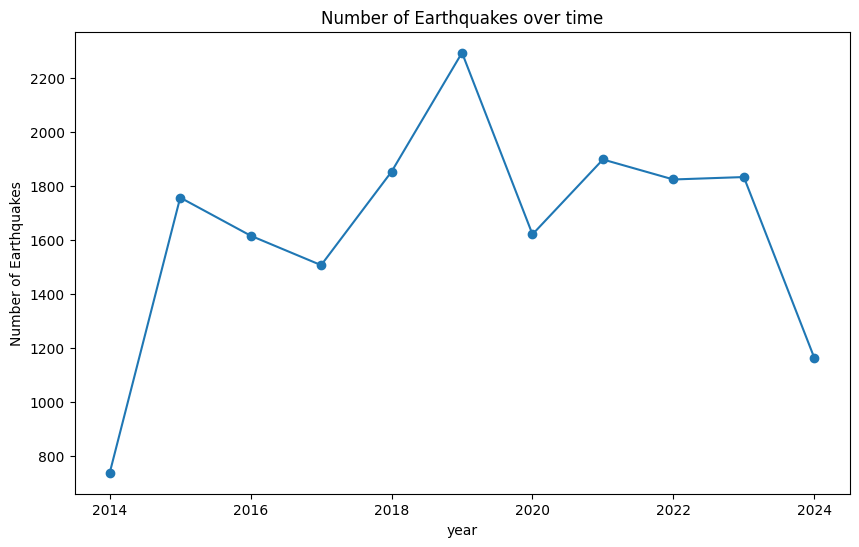

In [3]:
# Group the activities by year and count the number of earthquakes
data_modified.loc[:, 'year'] = data_modified['time'].dt.year

earthquakes_per_year = data_modified.groupby('year').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o')
plt.title('Number of Earthquakes over time')
plt.xlabel('year')
plt.ylabel('Number of Earthquakes')
plt.show()

## Ploting a graph of the seasonal effect to number of earthquakes

C:\Users\robin\AppData\Local\Temp\ipykernel_11920\985128651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'month'] = data_modified['time'].dt.month


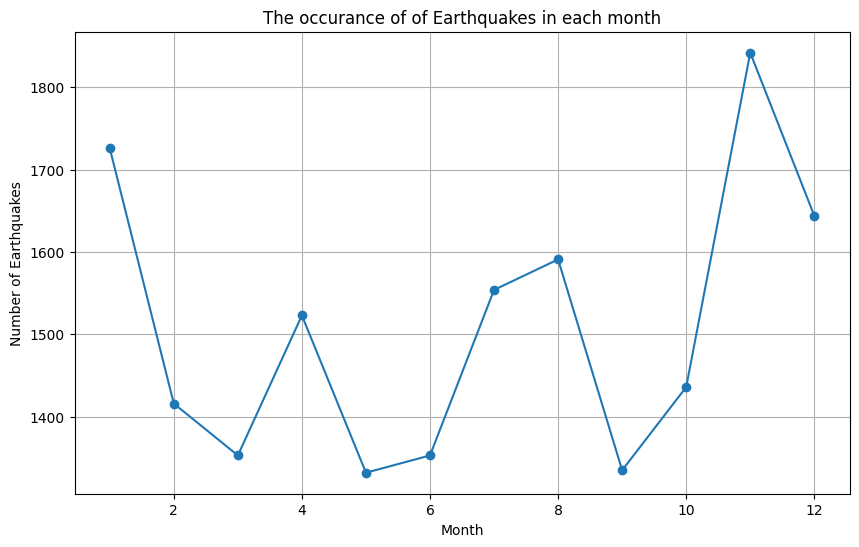

In [4]:
# Group the activities by month and count the number of earthquakes
data_modified.loc[:, 'month'] = data_modified['time'].dt.month

earthquakes_per_month = data_modified.groupby('month').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.plot(earthquakes_per_month.index, earthquakes_per_month.values, marker='o')
plt.title('The occurance of of Earthquakes in each month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

## Plotting the distribution of the magnitude of the earthquakes

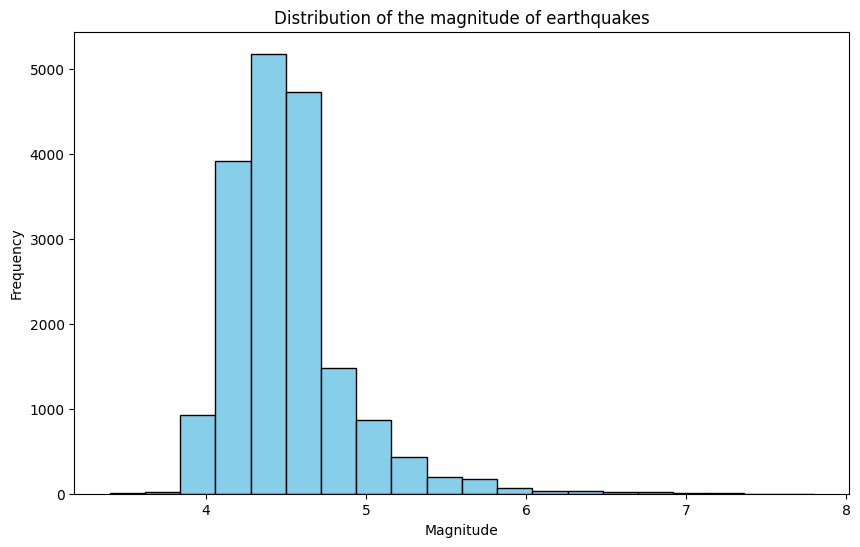

count    18105.000000
mean         4.489671
std          0.381659
min          3.400000
25%          4.200000
50%          4.400000
75%          4.600000
max          7.800000
Name: mag, dtype: float64


In [5]:
# Plot the distribution of the magnitude of earthquakes
plt.figure(figsize=(10,6))
plt.hist(data_modified['mag'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of the magnitude of earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of magnitudes
print(df['mag'].describe())